In [66]:
# %load /home/dan/.jupyter/firstcell.py
%load_ext autoreload
%autoreload 2

import sys
import os
import time

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

font = {'size'   : 14}
mpl.rc('font', **font)

import numpy as np
import pandas as pd

from scipy import stats
import sklearn
from sklearn import cluster
import scprep

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# %load /home/dan/.jupyter/sc.py
import phate
import scprep
import magic
import meld
import graphtools as gt



In [61]:
data = [np.random.normal(size=(1000,2)),
        np.random.normal([0,5],size=(1000,2)),
        np.random.normal([5,0],size=(1000,2))]

data = np.concatenate(data,axis=0)

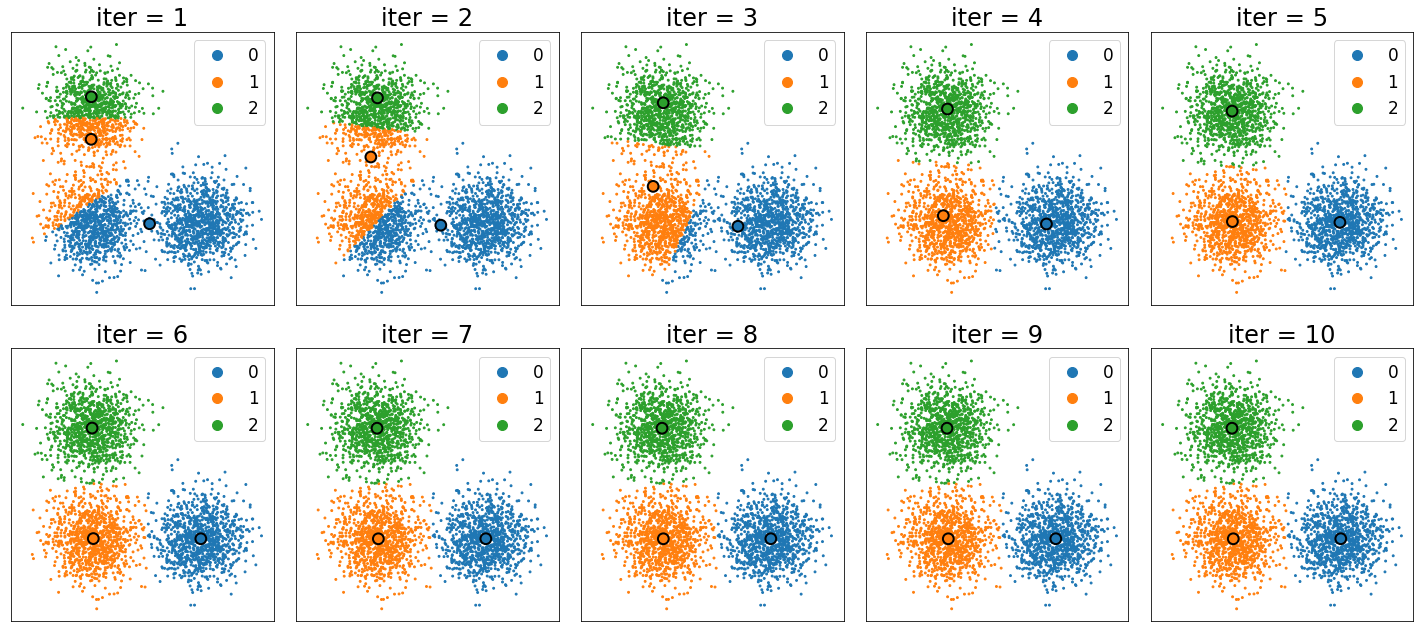

In [62]:
fig, axes = plt.subplots(2,5, figsize=(20,9))

for i, ax in enumerate(axes.flatten()):
    km_op = cluster.KMeans(n_clusters=3, max_iter=1 + i, n_init=1, random_state=0, init='random')
    clusters = km_op.fit_predict(data)

    scprep.plot.scatter2d(data, c=clusters, ax=ax, title='iter = {}'.format(i+1))
    scprep.plot.scatter2d(km_op.cluster_centers_, c=np.arange(np.max(clusters)+1), 
                          edgecolor='k', linewidth=2,
                          ticks=None, ax=ax)
    
fig.tight_layout()
fig.savefig('../img/KMeans.convergence.plot.png', dpi=300)

In [63]:
inertia = []
for i in range(40):
    km_op = cluster.KMeans(n_clusters=3, max_iter=1 + i, n_init=1, random_state=0, init='random')
    clusters = km_op.fit_predict(data)
    inertia.append(km_op.inertia_)

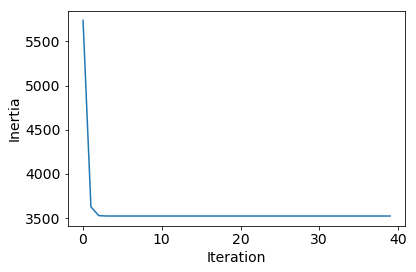

In [15]:
plt.Figure((4,3))
plt.plot(np.arange(40), inertia)
plt.xlabel('Iteration')
plt.ylabel('Inertia')
plt.tight_layout()
plt.savefig('../img/KMeans.convergence.loss.png', dpi=300)

#### Not a free lunch

In [32]:
import sklearn.datasets
data, truth = sklearn.datasets.make_circles(n_samples=1000, noise=0.01)

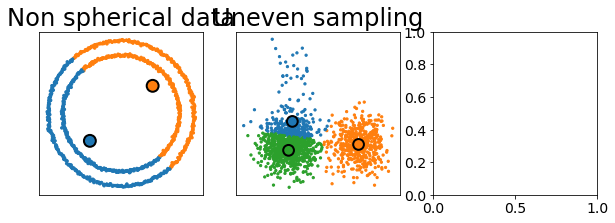

In [64]:
fig, axes = plt.subplots(1,3, figsize=(10,3))

# Two circles
data, truth = sklearn.datasets.make_circles(n_samples=1000, noise=0.01)

km_op = cluster.KMeans(n_clusters=2)
clusters = km_op.fit_predict(data)

scprep.plot.scatter2d(data, c=clusters, ax=axes[0], title='Non spherical data'.format(i+1), legend=False)
scprep.plot.scatter2d(km_op.cluster_centers_, c=np.arange(np.max(clusters)+1), 
                      edgecolor='k', linewidth=2, legend=False,
                      ticks=None, ax=axes[0])

# Uneven sampling
data = [np.random.normal(size=(1000,2)),
        np.random.normal([0,5],size=(30,2)),
        np.random.normal([5,0],size=(500,2))]

data = np.concatenate(data,axis=0)

km_op = cluster.KMeans(n_clusters=3)
clusters = km_op.fit_predict(data)

scprep.plot.scatter2d(data, c=clusters, ax=axes[1], title='Uneven sampling'.format(i+1), legend=False)
scprep.plot.scatter2d(km_op.cluster_centers_, c=np.arange(np.max(clusters)+1), 
                      edgecolor='k', linewidth=2, legend=False,
                      ticks=None, ax=axes[1])


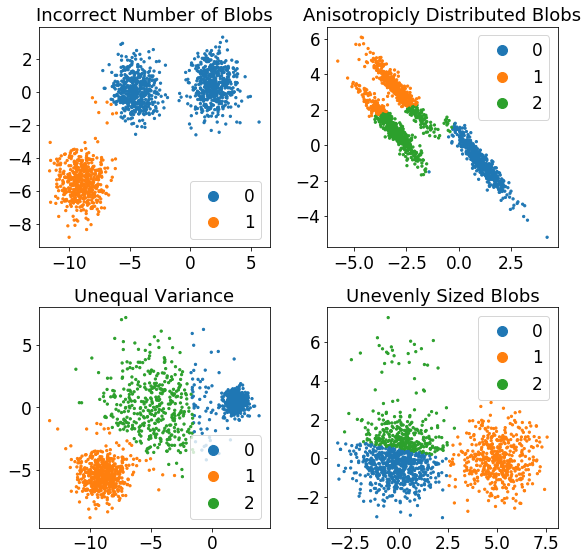

In [77]:
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(8.5, 8))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

ax = plt.subplot(221)
scprep.plot.scatter(X[:, 0], X[:, 1], c=y_pred, ax=ax)
plt.title("Incorrect Number of Blobs", fontsize=18)

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

ax = plt.subplot(222)
scprep.plot.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred, ax=ax)
plt.title("Anisotropicly Distributed Blobs", fontsize=18)

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

ax = plt.subplot(223)
scprep.plot.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred, ax=ax)
plt.title("Unequal Variance", fontsize=18)

# Unevenly sized blobs
data = [np.random.normal(size=(1000,2)),
        np.random.normal([0,5],size=(30,2)),
        np.random.normal([5,0],size=(500,2))]

data = np.concatenate(data,axis=0)

km_op = cluster.KMeans(n_clusters=3)
clusters = km_op.fit_predict(data)
ax = plt.subplot(224)
scprep.plot.scatter2d(data, c=clusters, ax=ax)
#scprep.plot.scatter2d(km_op.cluster_centers_, c=np.arange(np.max(clusters)+1), 
#                      edgecolor='k', linewidth=2, legend=False,
#                      ax=axes[1])
#X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
#y_pred = KMeans(n_clusters=3,
#                random_state=random_state).fit_predict(X_filtered)
#
#ax = plt.subplot(224)
#scprep.plot.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred, ax=ax)
plt.title("Unevenly Sized Blobs", fontsize=18)

plt.tight_layout()
plt.savefig('../img/KMeans.lunch.assumptions.png', dpi=300)

In [6]:
import louvain
G_igraph = G.to_igraph()
part = louvain.find_partition(G_igraph)
clusters = np.array(part.membership)

NameError: name 'G' is not defined

### Spectral clustering

#### Generate unevenly sampled data

In [55]:
data = [np.random.normal(size=(1000,2)),
        np.random.normal([0,5],size=(30,2)),
        np.random.normal([5,0],size=(500,2))]

data = np.concatenate(data,axis=0)

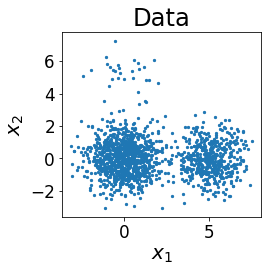

In [83]:
fig, ax = plt.subplots(1, figsize=(4,4))
scprep.plot.scatter2d(data, title='Data',
                      xlabel=r'$x_1$',
                      ylabel=r'$x_2$',
                      ax=ax)

fig.tight_layout()
fig.savefig('../img/SpectralClustering.data.png', dpi=300)

In [57]:
clusters= cluster.KMeans(3).fit_predict(data)

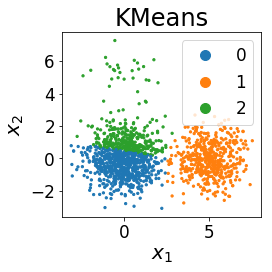

In [84]:
fig, ax = plt.subplots(1, figsize=(4,4))
scprep.plot.scatter2d(data, c=clusters,title='KMeans',
                      xlabel=r'$x_1$',
                      ylabel=r'$x_2$',
                      ax=ax)

fig.tight_layout()
fig.savefig('../img/SpectralClustering.kmeans_results.png', dpi=300)

In [ ]:
G = gt.Graph(data, use_pygsp=True)

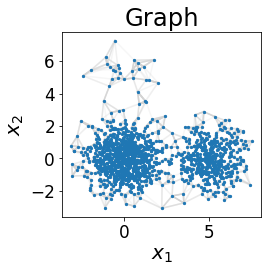

In [82]:
fig, ax = plt.subplots(1, figsize=(4,4))
scprep.plot.scatter2d(data, title='Graph',
                      xlabel=r'$x_1$',
                      ylabel=r'$x_2$',
                      zorder=10,
                      ax=ax)

for i, row in enumerate(G.K.toarray()):
    n_row = np.argsort(row)[::-1]
    for j in n_row[1:6]:
        ax.plot([data[i,0], data[j,0]],
               [data[i,1], data[j,1]], 
                c='lightgrey', alpha=G.K[i,j], zorder=0)
    
fig.tight_layout()
fig.savefig('../img/SpectralClustering.graph.png', dpi=300)

In [34]:
for i, row in enumerate(G.K.toarray()):
    n_row = np.argsort(row)[::-1]
    for j in n_row[1:5]:
        ax.plot([data[i,0], data[j,0]],
               [data[i,1], data[j,1]])

In [43]:
G.K[i,].mean()

0.0030472803929940417

In [36]:
data.shape

(1800, 2)

In [35]:
n_row

array([1799, 1623, 1309, ..., 1200, 1201,    0])

In [79]:
G = gt.Graph(data, use_pygsp=True)

In [80]:
G.compute_fourier_basis()

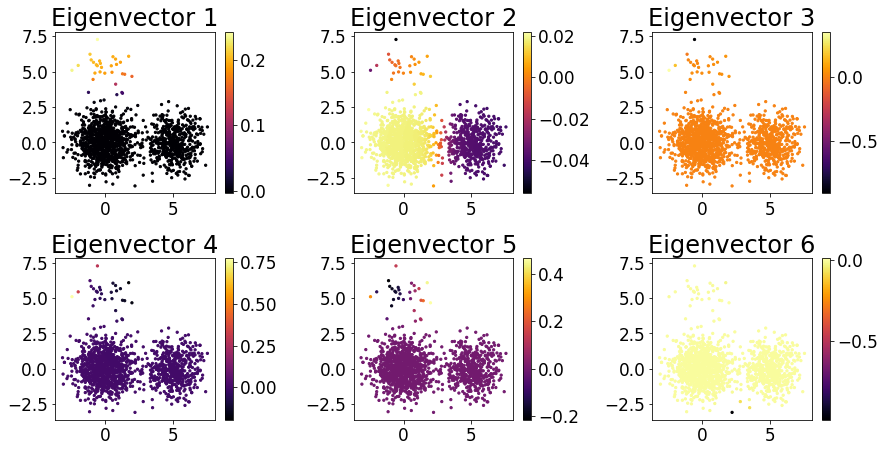

In [173]:
fig, axes = plt.subplots(2, 3, figsize=(12.5,6.5))

for i, ax in enumerate(axes.flatten()):
    scprep.plot.scatter2d(data, c=G_sklearn.U[:,1+i],
                          title='Eigenvector {}'.format(i+1),
                          #ticks=None,
                          ax=ax)
    
fig.tight_layout()
fig.savefig(c

In [ ]:
G_sklearn.U[:,1:5]

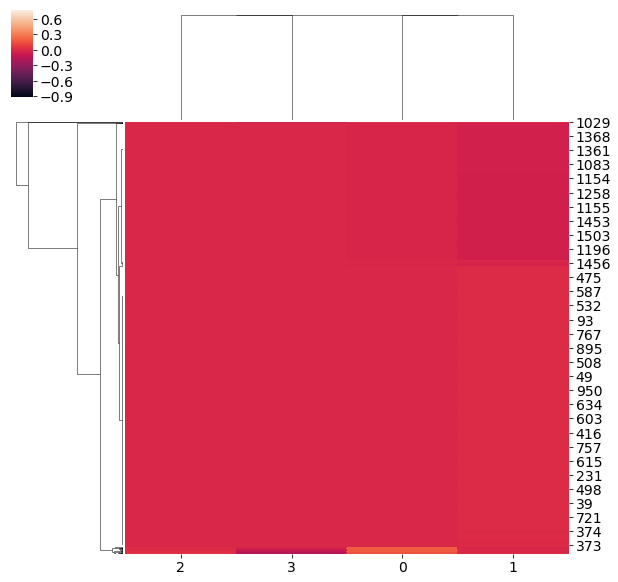

In [172]:
sns.clustermap(G_sklearn.U[:,1:5])

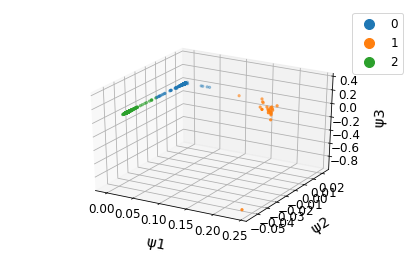

In [197]:
plt.Figure((8,8))
ax = scprep.plot.scatter3d(G_sklearn.U[:,1:4], c=clusters,
                          xlabel=' \n \n ψ1',
                          ylabel=' \n \n ψ2',
                          zlabel=' \n \n ψ3', fontsize=10)

ax.dist = 13
fig = ax.figure
fig.tight_layout(w_pad=10, h_pad=10)
fig.savefig('../img/SpectralClustering.eigen-projection.cluster.png', dpi=300)

In [167]:
clusters =sklearn.cluster.KMeans(3).fit_predict(G.U[:,1:5])

In [169]:
spec_op = cluster.SpectralClustering(n_clusters=3)
_ = spec_op.fit_predict(data)

G_sklearn = gt.Graph(spec_op.affinity_matrix_, precomputed='affinity', use_pygsp=True)

clusters = sklearn.cluster.KMeans(3).fit_predict(G_sklearn.U[:,1:5])

2019-10-09 14:48:04,633:[WARNING](pygsp.graphs.graph._check_fourier_properties): The Fourier basis G.U is not available, we need to compute the Fourier basis. Explicitly call G.compute_fourier_basis() once beforehand to suppress the warning.


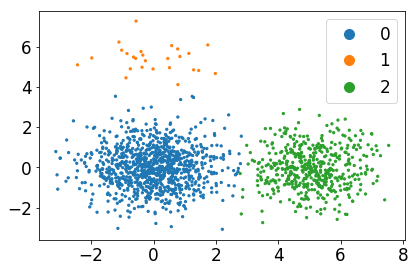

In [174]:
scprep.plot.scatter2d(data, c=clusters)

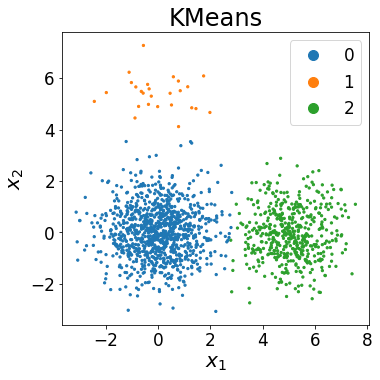

In [199]:
fig, ax = plt.subplots(1, figsize=(5.5,5.5))
scprep.plot.scatter2d(data, c=clusters,title='KMeans',
                      xlabel=r'$x_1$',
                      ylabel=r'$x_2$',
                      ax=ax)

fig.tight_layout()
fig.savefig('../img/SpectralClustering.spectral.png', dpi=300)

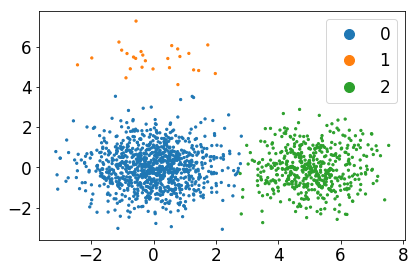

In [147]:
scprep.plot.scatter2d(data, c=clusters)

In [78]:
import pygsp

In [92]:
SBM = pygsp.graphs.StochasticBlockModel(N=300, k=4)

In [93]:
SBM.set_coordinates()

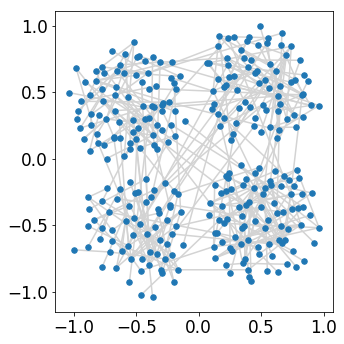

In [181]:

ax = scprep.plot.scatter2d(SBM.coords, s=30, figsize=(5,5))
K = SBM.A.astype(int).toarray()
for i, row in enumerate(K):
    n_row = np.argsort(row)[::-1]
    for j in n_row[1:2]:
        ax.plot([SBM.coords[i,0], SBM.coords[j,0]],
               [SBM.coords[i,1], SBM.coords[j,1]], 
                c='lightgrey', alpha=K[i,j], zorder=0)
fig = ax.figure
fig.tight_layout()
fig.savefig('../img/SpectralClustering.SBM_data.png', dpi=300)

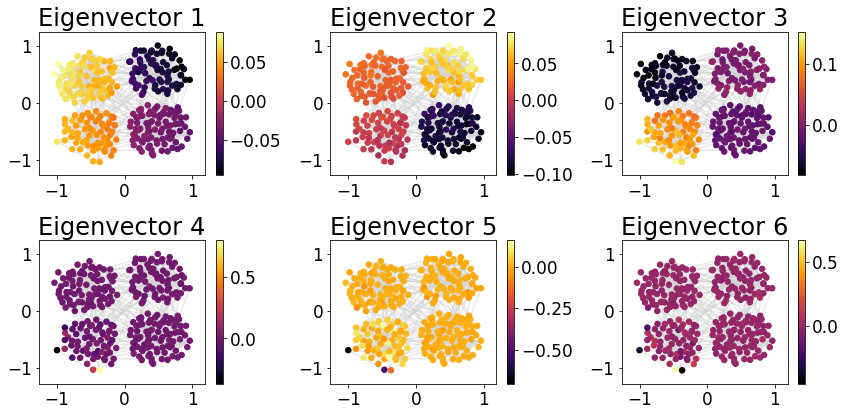

In [179]:
fig, axes = plt.subplots(2,3, figsize=(12,6))

for i, ax in enumerate(axes.flatten()):
    ax = scprep.plot.scatter2d(SBM.coords, c=SBM.U[:,i+1], 
                               title='Eigenvector {}'.format(i+1),
                               s=30, ax=ax)
    for i, row in enumerate(SBM.A.astype(int).toarray()):
        n_row = np.argsort(row)[::-1]
        for j in n_row[1:3]:
            ax.plot([SBM.coords[i,0], SBM.coords[j,0]],
                    [SBM.coords[i,1], SBM.coords[j,1]], 
                    c='lightgrey', alpha=0.5, zorder=0)
            
fig.tight_layout()
fig.savefig('../img/SpectralClustering.SBM_eigenvectors.png', dpi=300)

In [120]:
SBM.U

2019-10-09 14:24:30,569:[WARNING](pygsp.graphs.graph._check_fourier_properties): The Fourier basis G.U is not available, we need to compute the Fourier basis. Explicitly call G.compute_fourier_basis() once beforehand to suppress the warning.


array([[-0.05773503,  0.05942511, -0.01145323, ...,  0.00965551,
        -0.00180177,  0.00062658],
       [-0.05773503,  0.04369844,  0.00445238, ...,  0.01540469,
        -0.01161716,  0.00640319],
       [-0.05773503,  0.03608543,  0.00551691, ..., -0.00145528,
         0.00590121, -0.00633519],
       ...,
       [-0.05773503, -0.03633084, -0.08221601, ...,  0.02155216,
        -0.05325031, -0.00561533],
       [-0.05773503, -0.02685119, -0.08803679, ..., -0.09713295,
         0.10138541, -0.04129416],
       [-0.05773503, -0.02766445, -0.08237628, ..., -0.03153651,
         0.04030562,  0.04220373]])

In [124]:
MN = pygsp.graphs.Minnesota()

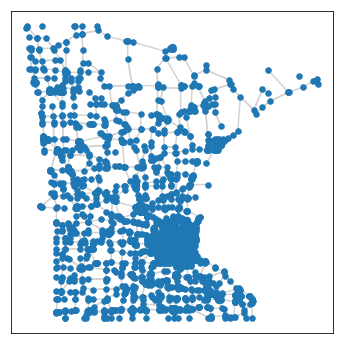

In [178]:
fig, ax = plt.subplots(1, figsize=(5,5))
ax = scprep.plot.scatter2d(MN.coords, s=30, ax=ax, ticks=None)

K = MN.A.astype(int).toarray()
for i, row in enumerate(K):
    n_row = np.argsort(row)[::-1]
    for j in n_row[1:3]:
        if K[i,j] == 0:
            continue
        ax.plot([MN.coords[i,0], MN.coords[j,0]],
               [MN.coords[i,1], MN.coords[j,1]], 
                c='lightgrey', alpha=K[i,j], zorder=0)
        
fig.tight_layout()
fig.savefig('../img/SpectralClustering.MN_data.png', dpi=300)

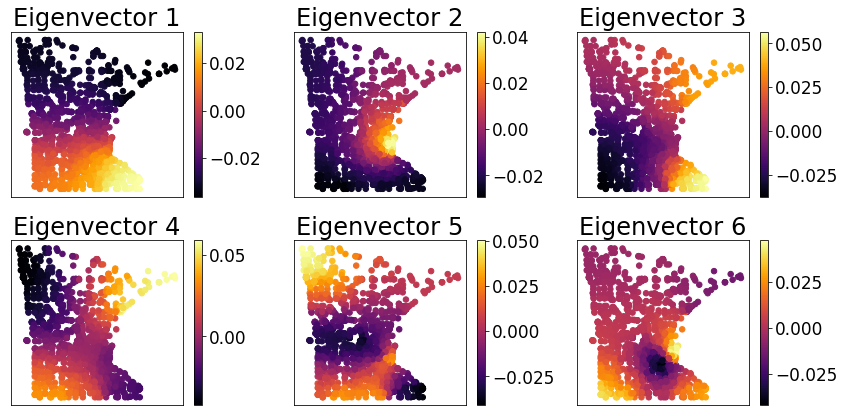

In [177]:
fig, axes = plt.subplots(2,3, figsize=(12,6))

for i, ax in enumerate(axes.flatten()):
    ax = scprep.plot.scatter2d(MN.coords, c=MN.U[:,i+1], 
                               title='Eigenvector {}'.format(i+1),
                               ticks=None,
                               s=30, ax=ax)
    #K = MN.A.astype(int).toarray()
    #for i, row in enumerate(K):
    #    n_row = np.argsort(row)[::-1]
    #    for j in n_row[1:3]:
    #        if K[i,j] == 0:
    #            continue
    #        ax.plot([MN.coords[i,0], MN.coords[j,0]],
    #               [MN.coords[i,1], MN.coords[j,1]], 
    #                c='lightgrey', alpha=K[i,j], zorder=0)
            
fig.tight_layout()
fig.savefig('../img/SpectralClustering.MN_eigenvectors.png', dpi=300)

In [ ]:
scprep.io.download.download_google_drive("1kxsMav1ly_S6pQ1vKeAtlFFW3QVvilz0", "shekhar_data.pkl")
scprep.io.download.download_google_drive("1J4K8bo8Pys-8xayO5vtMK3t5wJ0_TG2Y", "shekhar_clusters.pkl")

data = pd.read_pickle("shekhar_data.pkl")
clusters = pd.read_pickle("shekhar_clusters.pkl")